In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load Image

In [3]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

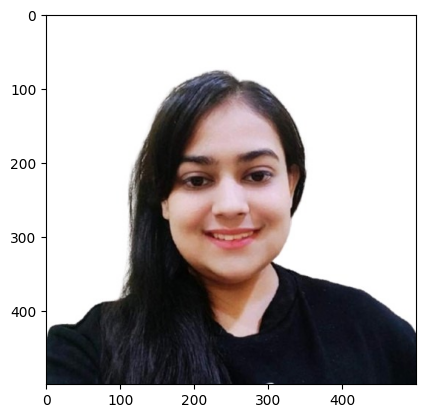

In [4]:
filename = "image1.jpg"
img = read_file(filename)

org_img = np.copy(img)

Create Edge Mask

In [5]:
def edge_mask(img, line_size, blur_value):

# input: input images
# Output: Edges of the images

  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray,blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, line_size, blur_value)

  return edges

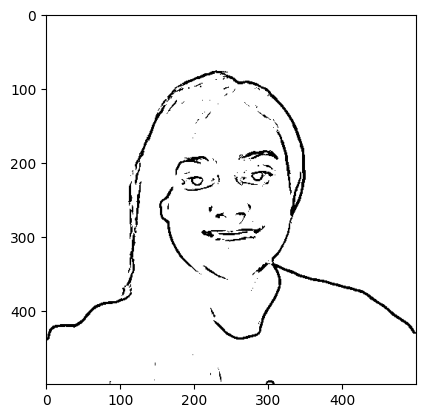

In [6]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap="gray")
plt.show()

In [7]:
#Reduce a color pallet

In [8]:
def color_quantization(img, k):

  # Tansform the image
  data = np.float32(img).reshape((-1,3))

  # Determine Criteria
  Criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

  #implementation k-means clustering
  ret, label, center = cv2.kmeans(data,k,None,Criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

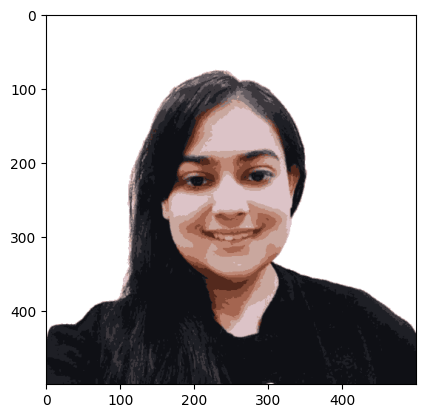

In [9]:
img = color_quantization(img, k=12)

plt.imshow(img)
plt.show()

Reduce the noise

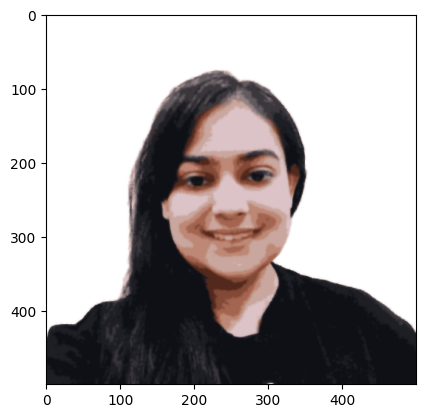

In [10]:
blurred = cv2.bilateralFilter(img, d=5, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [11]:
# Combining edge mask with quantiz img

In [12]:
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask = edges)

  plt.imshow(c)
  plt.show()

  plt.imshow(org_img)
  plt.show()

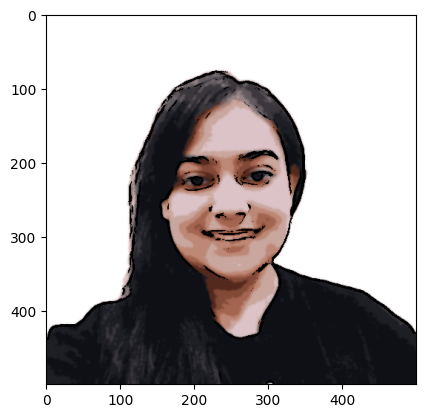

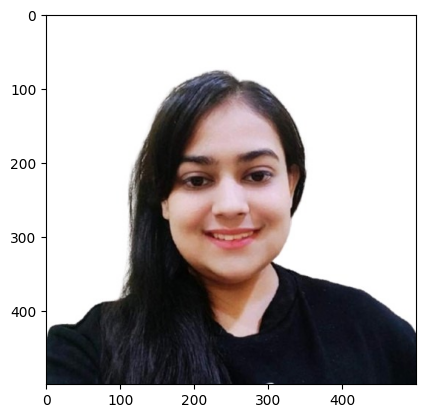

In [13]:
cartoon()